In [1]:
import sys

import zenzo as z

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

## Create dataset

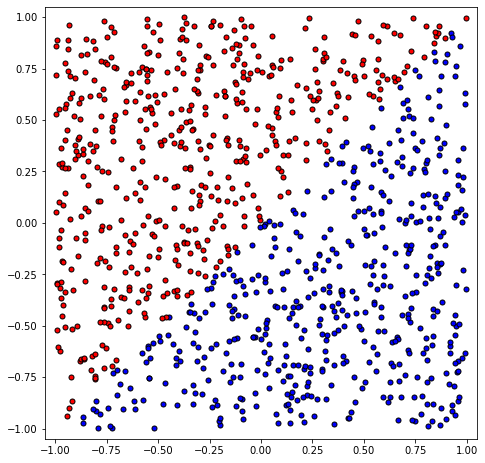

In [2]:
f = lambda x: x
X, y = z.binary_classification_dataset(f, 1000, scale=2)
fig = plt.figure(figsize = (6, 6))
ax = fig.add_axes(rect = [0,0,1,1])
ax.set_xlim(left = -1.05, right=1.05)
ax.set_ylim(bottom = -1.05, top=1.05)

ax_list = fig.axes
print(ax_list)


z.plot_2Dpoints(X.numpy(), y.numpy(), ax)

In [3]:
model = z.LogisticClassifier()

In [4]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Train model

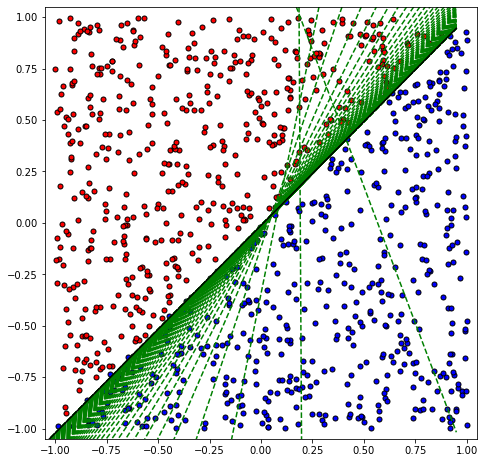

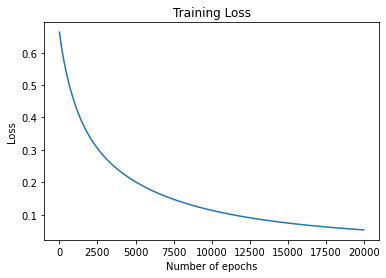

Final training loss: 0.05304667726159096


In [5]:
n_epochs = 20000
losses = []

fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.set_xlim(left = -1.05, right=1.05)
ax.set_ylim(bottom = -1.05, top=1.05)

for epoch in range(n_epochs):  
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % (n_epochs // 100) == 0:
        weights = list(model.parameters())[0][0].detach().numpy()
        bias = list(model.parameters())[1][0].detach().numpy()
        z.plot_line(-weights[0]/weights[1], bias/weights[1], ax, color='g--')


weights = list(model.parameters())[0][0].detach().numpy()
bias = list(model.parameters())[1][0].detach().numpy()
z.plot_line(-weights[0]/weights[1], bias/weights[1], ax, color='black')

z.plot_2Dpoints(X.detach().numpy(), y.detach().numpy(), ax)
plt.show()


# Plotting the loss
plt.title("Training Loss")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(list(range(len(losses))), losses)
plt.show()


print("Final training loss:", losses[-1])

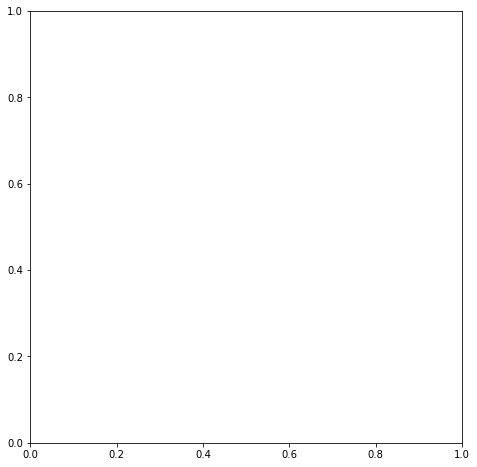

In [6]:
fig = plt.figure(figsize=(6,6))
ax=fig.add_axes([0,0,1,1])
ax_list = fig.axes
print(ax_list)